In [2]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
app_data = pd.read_csv('FineTech_appData.csv')

In [4]:
app_data.shape

(50000, 12)

In [5]:
app_data.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [6]:
#null checks in data set
app_data.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [7]:
#Info abount data
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [8]:
#Describe Data
app_data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Find Unique dayofweek
app_data['dayofweek'].value_counts()

4    7531
0    7515
5    7423
6    7418
1    7139
3    6659
2    6315
Name: dayofweek, dtype: int64

In [10]:
# Convert hour string to int
app_data['hour'] = app_data['hour'].str.slice(1,3).astype('int')

In [11]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null int64
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(9), object(3)
memory usage: 4.6+ MB


In [12]:
#Remove Object data

app_data2 = app_data.drop(['user','first_open','screen_list','enrolled_date'],axis=1)

In [13]:
app_data2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

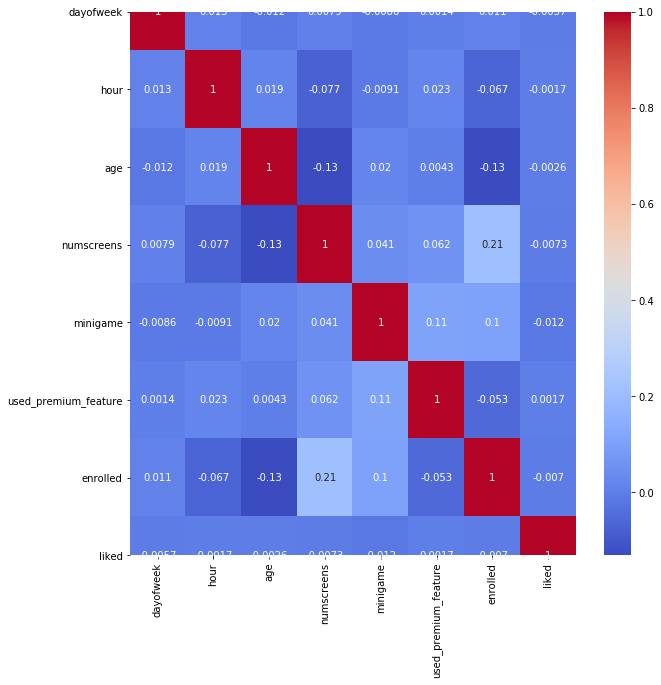

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(app_data2.corr(),annot = True, cmap ='coolwarm')

/Users/kmallick/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/kmallick/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


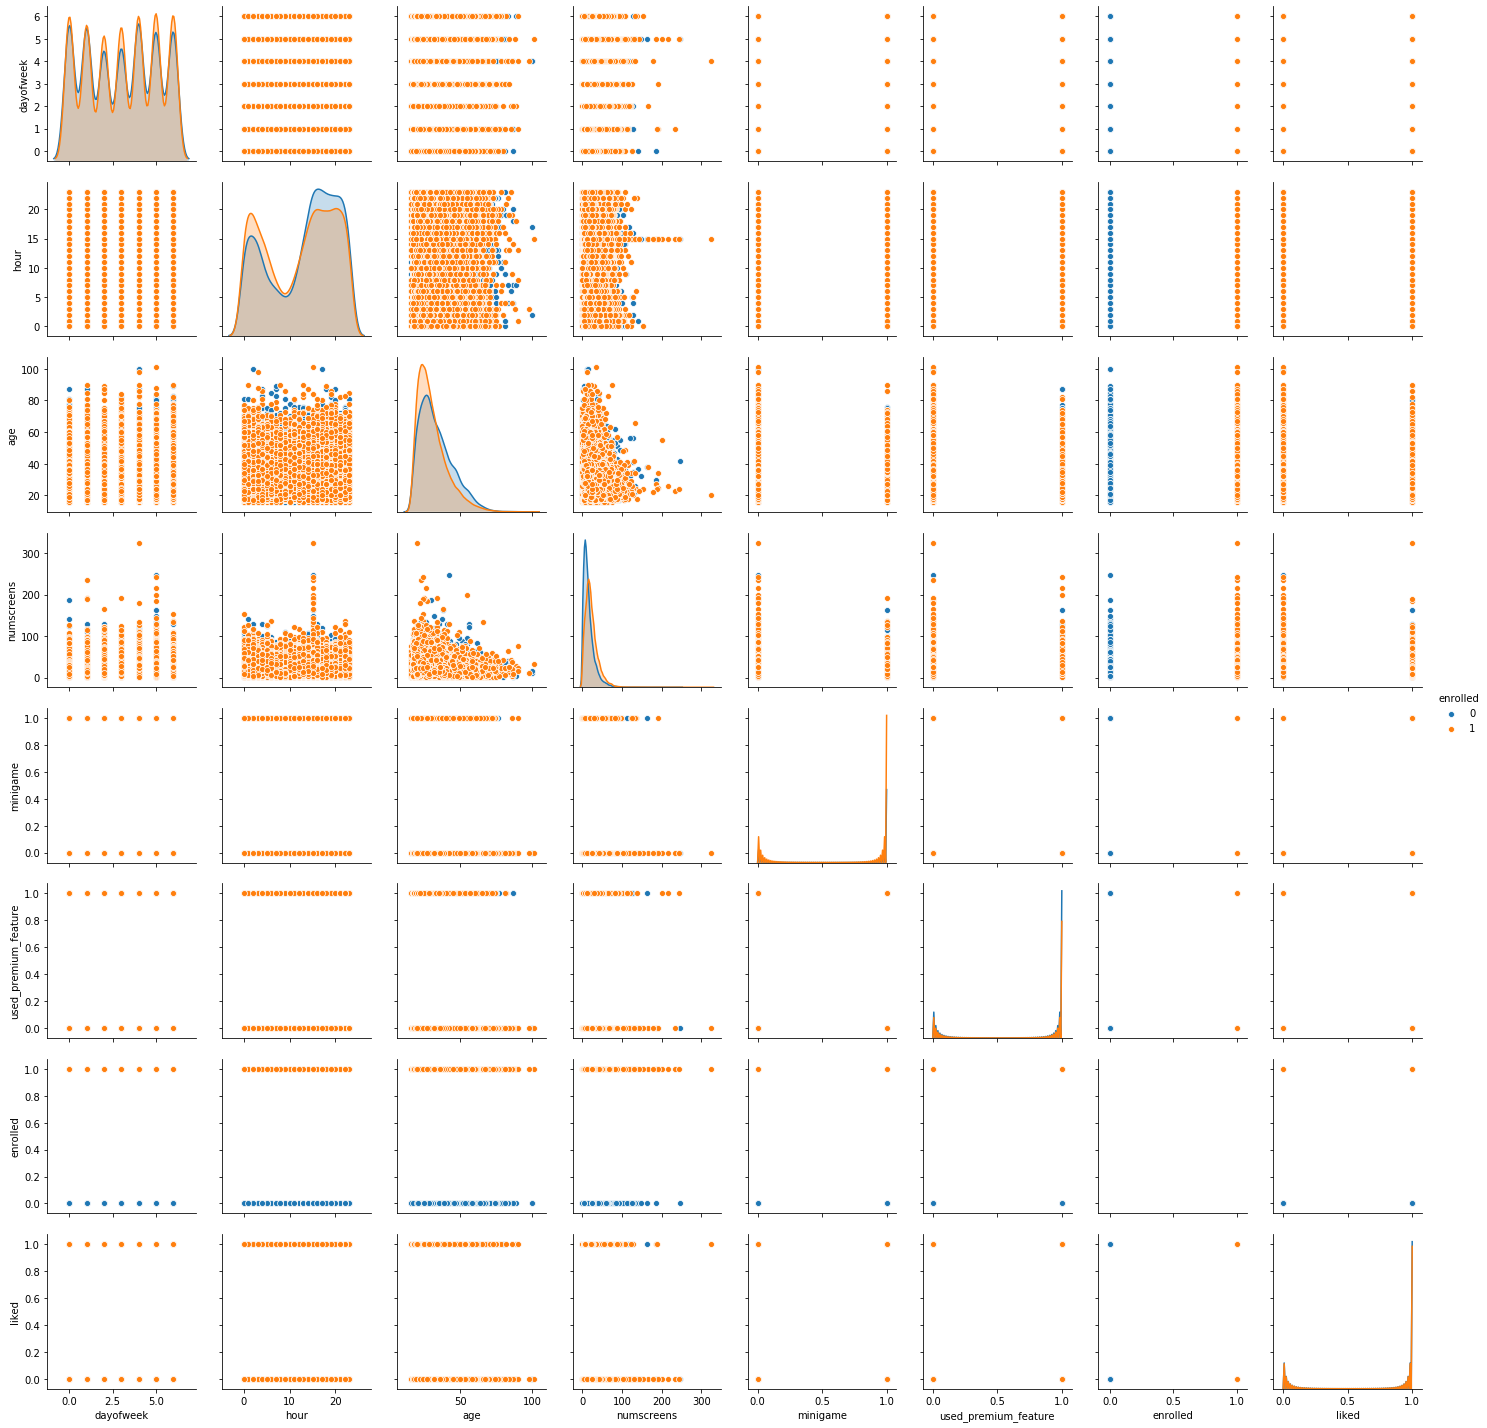

In [16]:
sns.pairplot(app_data2,hue='enrolled')

In [17]:
import plotly.graph_objects as go
import plotly.offline as pyo

In [18]:
'''data = [
    go.Bar(
        x=app_data2['enrolled'].value_counts().to_dense().keys(),
        y=app_data2['enrolled'].value_counts(),
    )]

layout = go.Layout(
    title='Enroled count',
    xaxis=dict(title='enrolled'),
    yaxis=dict(title='counts'),
    hovermode='closest',
    #textposition="top center"
)


fig =go.Figure(data = data,layout=layout)

fig
'''

'data = [\n    go.Bar(\n        x=app_data2[\'enrolled\'].value_counts().to_dense().keys(),\n        y=app_data2[\'enrolled\'].value_counts(),\n    )]\n\nlayout = go.Layout(\n    title=\'Enroled count\',\n    xaxis=dict(title=\'enrolled\'),\n    yaxis=dict(title=\'counts\'),\n    hovermode=\'closest\',\n    #textposition="top center"\n)\n\n\nfig =go.Figure(data = data,layout=layout)\n\nfig\n'

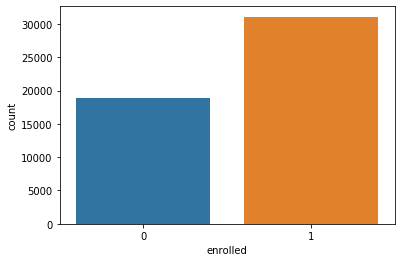

In [19]:
sns.countplot(app_data2.enrolled)

In [21]:
# value enrolled and not enrolled customers
fineTech_appData= app_data
print("Not enrolled user = ", (fineTech_appData.enrolled < 1).sum(), "out of 50000")
print("Enrolled user = ",50000-(fineTech_appData.enrolled < 1).sum(),  "out of 50000")

Not enrolled user =  18926 out of 50000
Enrolled user =  31074 out of 50000


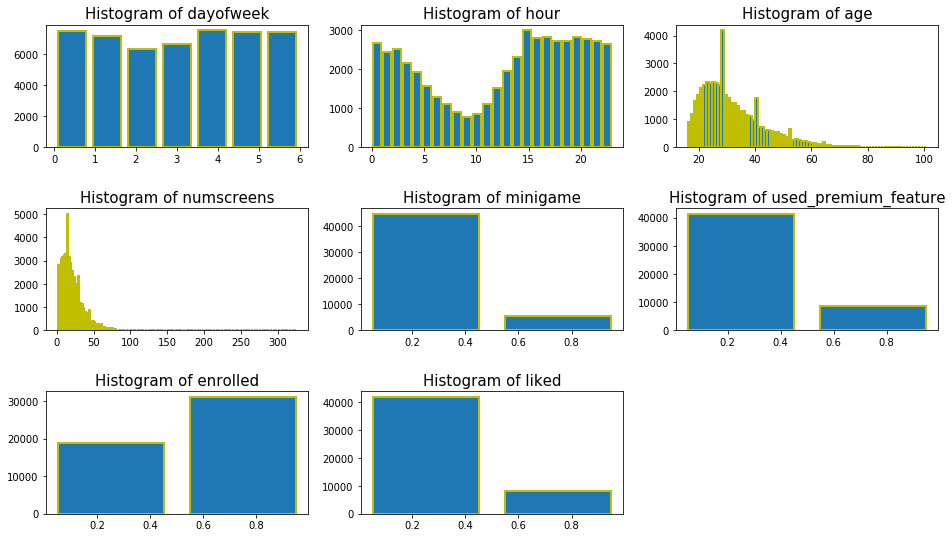

In [23]:
# plot histogram 
fineTech_appData2 = fineTech_appData.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis = 1)
plt.figure(figsize = (16,9)) # figure size in ratio 16:9
features = fineTech_appData2.columns # list of columns name
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) # create subplot for histogram
    plt.title("Histogram of {}".format(j), fontsize = 15) # title of histogram
     
    bins = len(fineTech_appData2[j].unique()) # bins for histogram
    plt.hist(fineTech_appData2[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) # plot histogram
     
plt.subplots_adjust(hspace=0.5) # space between horixontal axes (subplots)

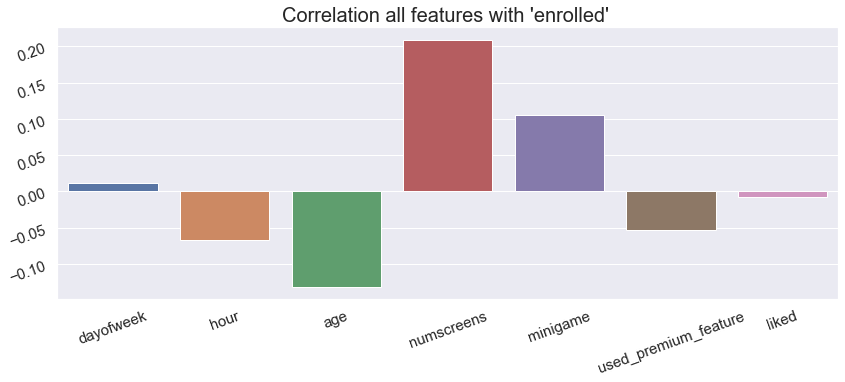

In [24]:
# show corelation barplot 
 
sns.set() # set background dark grid
plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize = 20)
fineTech_appData3 = fineTech_appData2.drop(['enrolled'], axis = 1) # drop 'enrolled' feature
ax =sns.barplot(fineTech_appData3.columns,fineTech_appData3.corrwith(fineTech_appData2.enrolled)) # plot barplot 
ax.tick_params(labelsize=15, labelrotation = 20, color ="k") # decorate x &amp; y ticks font

In [26]:
# parsinf object data into data time format
from dateutil import parser # convert time in date time data type
fineTech_appData['first_open'] =[parser.parse(i) for i in fineTech_appData['first_open']]
 
fineTech_appData['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in fineTech_appData['enrolled_date']]
 
fineTech_appData.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [27]:
fineTech_appData['time_to_enrolled']  = (fineTech_appData.enrolled_date - fineTech_appData.first_open).astype('timedelta64[h]')

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <a list of 10 Patch objects>)

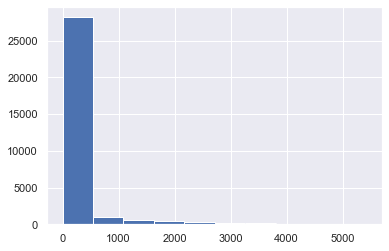

In [28]:
plt.hist(fineTech_appData['time_to_enrolled'].dropna())

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

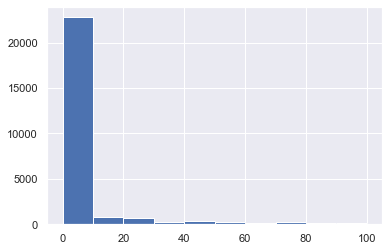

In [29]:
plt.hist(fineTech_appData['time_to_enrolled'].dropna(), range = (0,100)) 

In [30]:
# Those customers have enrolled after 48 hours set as 0
fineTech_appData.loc[fineTech_appData.time_to_enrolled > 48, 'enrolled'] = 0

In [31]:
fineTech_appData.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [33]:
# read csv file and convert it into numpy array
fineTech_app_screen_Data = pd.read_csv("top_screens.csv").top_screens.values
 
fineTech_app_screen_Data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [34]:
fineTech_appData['screen_list'] = fineTech_appData.screen_list.astype(str) + ','

In [35]:
# string into to number
 
for screen_name in fineTech_app_screen_Data:
    fineTech_appData[screen_name] = fineTech_appData.screen_list.str.contains(screen_name).astype(int)
    fineTech_appData['screen_list'] = fineTech_appData.screen_list.str.replace(screen_name+",", "")


In [36]:
# get shape
fineTech_appData.shape

(50000, 68)

In [37]:
# head of DataFrame
fineTech_appData.head(6)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,56480,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,1,0,1,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# remain screen in 'screen_list'
fineTech_appData.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [39]:
# count remain screen list and store counted number in 'remain_screen_list'
 
fineTech_appData['remain_screen_list'] = fineTech_appData.screen_list.str.count(",")

In [40]:
# Drop the 'screen_list'
fineTech_appData.drop(columns = ['screen_list'], inplace=True)

In [41]:
# total columns
fineTech_appData.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [42]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
fineTech_appData['saving_screens_count'] = fineTech_appData[saving_screens].sum(axis = 1)
fineTech_appData.drop(columns = saving_screens, inplace = True)

In [43]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
fineTech_appData['credit_screens_count'] = fineTech_appData[credit_screens].sum(axis = 1)
fineTech_appData.drop(columns = credit_screens, axis = 1, inplace = True)

In [44]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
fineTech_appData['cc_screens_count'] = fineTech_appData[cc_screens].sum(axis = 1)
fineTech_appData.drop(columns = cc_screens, inplace = True)

In [45]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
fineTech_appData['loan_screens_count'] = fineTech_appData[loan_screens].sum(axis = 1)
fineTech_appData.drop(columns = loan_screens, inplace = True)

In [46]:
fineTech_appData.shape

(50000, 50)

In [47]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
user                       50000 non-null int64
dayofweek                  50000 non-null int64
hour                       50000 non-null int64
age                        50000 non-null int64
numscreens                 50000 non-null int64
minigame                   50000 non-null int64
used_premium_feature       50000 non-null int64
enrolled                   50000 non-null int64
liked                      50000 non-null int64
location                   50000 non-null int64
Institutions               50000 non-null int64
VerifyPhone                50000 non-null int64
BankVerification           50000 non-null int64
VerifyDateOfBirth          50000 non-null int64
ProfilePage                50000 non-null int64
VerifyCountry              50000 non-null int64
Cycle                      50000 non-null int64
idscreen                   50000 non-null int64
Splash                     

In [48]:
fineTech_appData.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,0.293660,0.524600,0.319540,0.473480,0.158040,0.423160,0.364860,0.340700,0.200760,0.084000,0.048980,0.076540,0.073720,0.051520,0.053860,0.045080,0.030920,0.041420,0.047560,0.0,0.0455,0.041060,0.024420,0.026220,0.023580,0.031760,0.022460,0.029800,0.021160,0.096560,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,0.455443,0.499399,0.466303,0.499301,0.364782,0.494065,0.481396,0.473949,0.400573,0.277391,0.215828,0.265863,0.261317,0.221058,0.225743,0.207482,0.173103,0.199262,0.212836,0.0,0.2084,0.198431,0.154351,0.159791,0.151738,0.175362,0.148176,0.170037,0.143919,0.295361,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.0

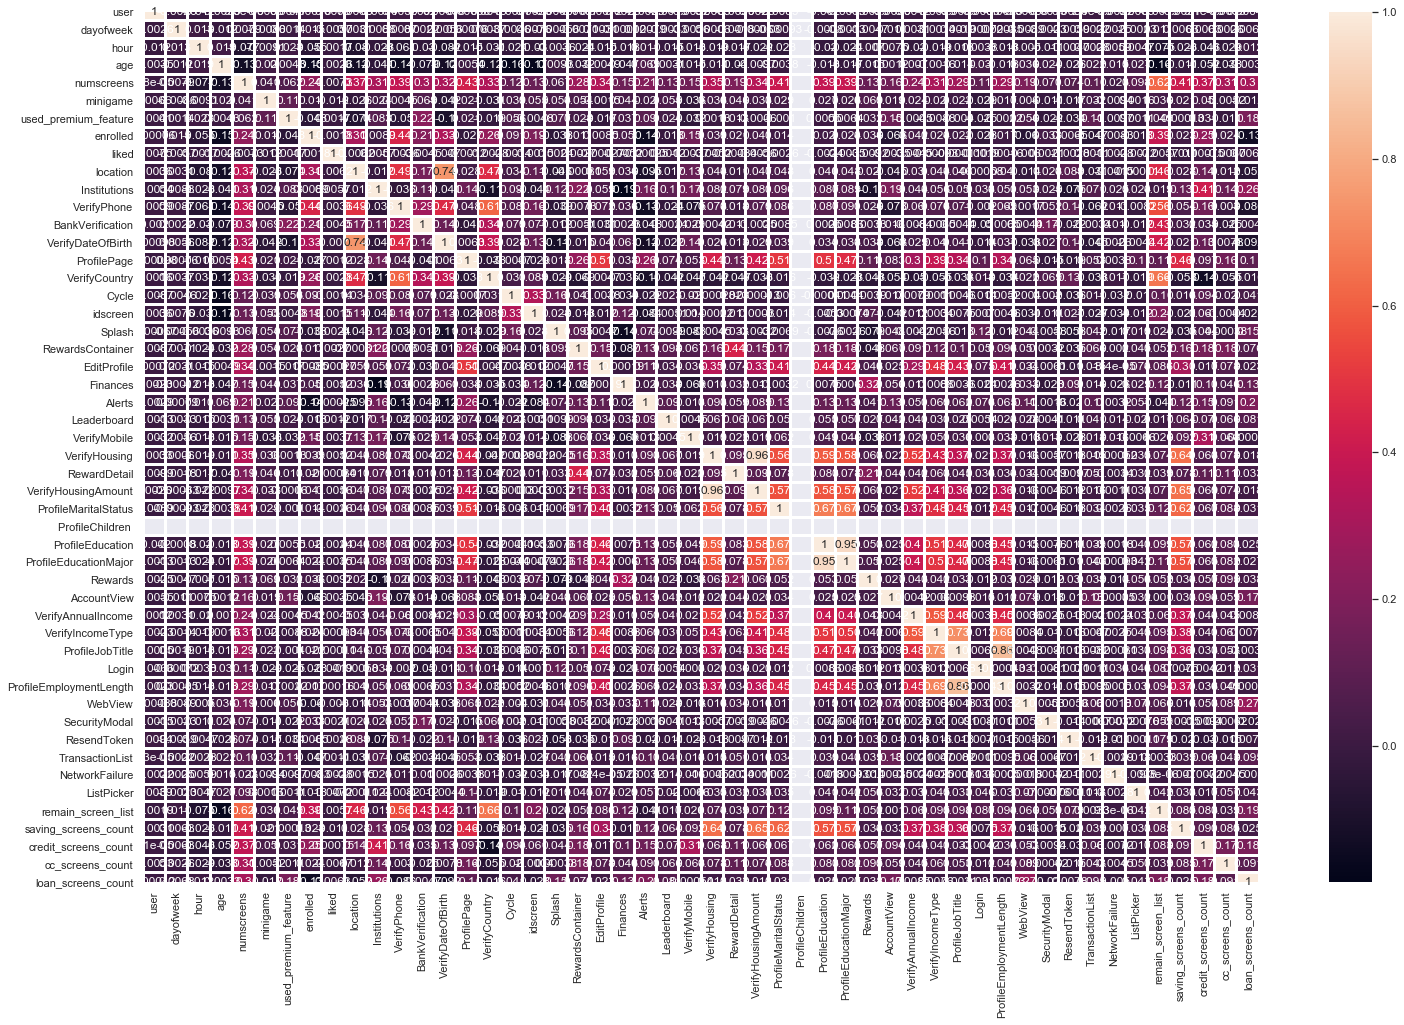

In [49]:
# Heatmap with correlation matrix of new fineTech_appData
 
plt.figure(figsize = (25,16)) 
sns.heatmap(fineTech_appData.corr(), annot = True, linewidth =2)

In [50]:
clean_fineTech_appData = fineTech_appData
target = fineTech_appData['enrolled']
fineTech_appData.drop(columns = 'enrolled', inplace = True)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fineTech_appData, target, test_size = 0.2, random_state = 0)

In [52]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 49)
Shape of X_test =  (10000, 49)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [53]:
# take User ID in another variable 
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

/Users/kmallick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (40000, 48)
Shape of X_test =  (10000, 48)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [56]:
# impoer required packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [57]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.6936

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
 
accuracy_score(y_test, y_pred_knn)

0.6994

In [59]:
# train with Standert Scaling dataset
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_knn_sc)

0.7314

In [60]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
 
accuracy_score(y_test, y_pred_nb)

0.7114

In [61]:
# train with Standert Scaling dataset
nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_nb_sc)

0.7114

In [62]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
 
accuracy_score(y_test, y_pred_rf)

0.7621

In [63]:
# train with Standert Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_rf_sc)

0.7616

In [64]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = 'l1')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
 
accuracy_score(y_test, y_pred_lr)

/Users/kmallick/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.7684

In [65]:
# train with Standert Scaling dataset
lr_model2 = LogisticRegression(random_state = 0, penalty = 'l1')
lr_model2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_lr_sc)

/Users/kmallick/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.7681

In [66]:
# Support Vector Machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
 
accuracy_score(y_test, y_pred_svc)

/Users/kmallick/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



0.7616

In [67]:
# train with Standert Scaling dataset
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_svc_sc)

/Users/kmallick/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



0.779

In [68]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.7748

In [69]:
# train with Standert Scaling dataset
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc)

0.7748

In [70]:
# XGB classifier with parameter tuning
xgb_model_pt1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt1.fit(X_train, y_train)
y_pred_xgb_pt1 = xgb_model_pt1.predict(X_test)
 
accuracy_score(y_test, y_pred_xgb_pt1)

0.7892

In [71]:
# XGB classifier with parameter tuning
# train with Stander Scaling dataset
xgb_model_pt2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc_pt2)

0.7893

Text(0.5, 1, 'Confussion Matrix')

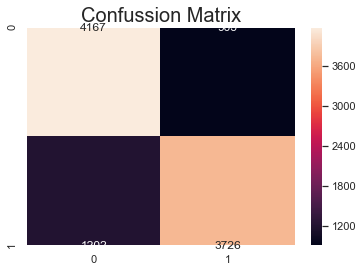

In [72]:
# confussion matrix
cm_xgb_pt2 = confusion_matrix(y_test, y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20) 

In [73]:
# Clasification Report
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc_pt2)
 
print("Classification report >>> \n", cr_xgb_pt2)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      5072
           1       0.80      0.76      0.78      4928

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [74]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model_pt2, X = X_train_sc, y = y_train, cv = 10)
print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())

Cross validation of XGBoost model =  [0.79230192 0.77855536 0.78875    0.78675    0.78075    0.78725
 0.7905     0.7815     0.79044761 0.77744436]
Cross validation of XGBoost model (in mean) =  0.7854249258671828


In [77]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['predicted result'] = y_pred_xgb_sc_pt2
 
print(final_result.head(10))

         user  enrolled  predicted result
11841  239786         1                 1
19602  279644         1                 1
45519   98290         0                 0
25747  170150         1                 1
42642  237568         1                 0
31902   65042         1                 0
30346  207226         1                 1
12363  363062         0                 0
32490  152296         1                 1
26128   64484         0                 0


In [76]:
## Pickle
import pickle
 
# save model
pickle.dump(xgb_model_pt2, open('FineTech_app_ML_model.pickle', 'wb'))
 
# load model
ml_model_pl = pickle.load(open('FineTech_app_ML_model.pickle', 'rb'))
 
# predict the output
y_pred_pl = ml_model.predict(X_test_sc)
 
# confusion matrix
cm_pl = confusion_matrix(y_test, y_pred)
print('Confussion matrix = \n', cm_pl)
 
# show the accuracy
print("Accuracy of model = ",accuracy_score(y_test, y_pred_pl))

NameError: name 'ml_model' is not defined

In [ ]:
## Joblib
from sklearn.externals import joblib
 
# save model
joblib.dump(xgb_model_pt2, 'FineTech_app_ML_model.joblib')
 
# load model
ml_model_jl = joblib.load('FineTech_app_ML_model.joblib')
 
# predict the output 
y_pred_jl = ml_model.predict(X_test_sc)
 
cm_jl = confusion_matrix(y_test, y_pred)
print('Confussion matrix = \n', cm_jl)
 
print("Accuracy of model = ", accuracy_score(y_test, y_pred_jl))